<a href="https://colab.research.google.com/github/ddlxdd/SOCI40133/blob/main/Xiaochen_Ding_Tutorial_1_machine_learning_pipelines_ipynb_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thinking with Deep Learning: Week 1 Part 1
# Introduction and Machine Learning

__Instructor:__ James Evans

__Notebook Author:__ Bhargav Srinivasa Desikan

__Teaching Assistants:__ Junsol Kim

# Know your tool: Google Colab.

This environment is a Colab. It's a Jupyter notebook hosted on the Google Cloud. We will do everything here: embed videos, embed questionnaires, and run our code. [Details](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk) on how to write markdown in it.

You can also mumble profound mathematical truths with LaTeX equations in Colab like Euler's Identity:

$e^{i\pi}=-1$

the Gaussian Integral:

$\int_{-\infty}^{\infty} e^{-x^2} \,dx = \sqrt{\pi}$

or (my favorite) Cantor's Cardinality of the Continuum:

${\rm I\!R} = 2^{\rm I\!N}$

You can also scribble down a diagram (like this Markov Chain network) and pop it in (with the embed picture icon above the cell):

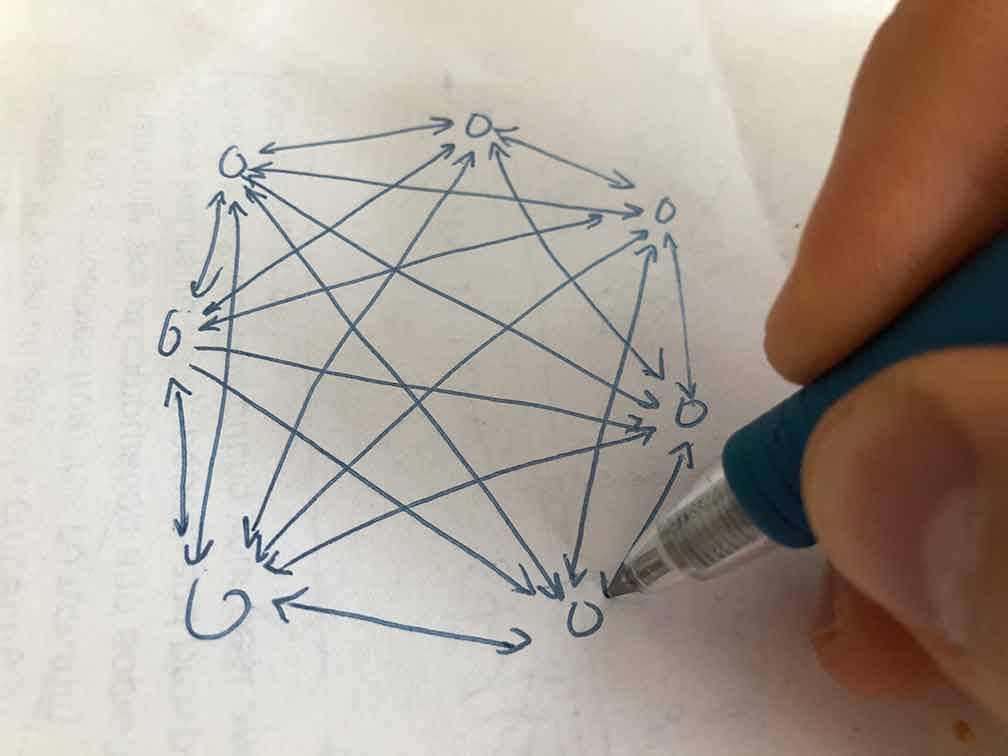

You'll soon be experts at this. One thing to remember is **always run all cells!**. We need you to press `Shift+Enter` or press the play button to show the videos and save your responses.

In [2]:
#@markdown What is your CNET ID and UChicago program? (text, not numbers, e.g. bfranklin)
CNETID = 'xcding' #@param {type:"string"}
program = 'MACSS' #@param ['Select', 'MACSS', 'MAPSS', 'MSCAPP', 'MSCAPP','MPCS','MSCA','MS_other','PHD_Sociology','PHD_Political_Science','PHD_Economics','PHD_other']


#### Ensure you're running a GPU notebook.

From "Runtime" in the drop-down menu above, click "Change runtime type". Ensure that "Hardware Accelerator" says "GPU".

#### Ensure you can save!

From "File", click "Save a copy in Drive"

You can also restart your runtime by runtime→restart your run time, which will release all the RAM.

#### A little more about you:

In [3]:
#@markdown Which week of the course are you most excited for?
week = 1 #@param {type:"number"}

In [4]:
#@markdown How important are Deep Learning Methods vs. Social Science Applications for you?
methods_or_applications = 3.6 #@param {type:"slider", min:0, max:10, step:0.1}

#### Save your answers

After you type into a form or complete a poll, like you just did, make sure you ran the cell to save your answer. Your answer will be saved in a variable:

In [5]:
print(CNETID, week, methods_or_applications)

xcding 1 3.6


## Colab and Google Drive
When you create a notebook on google colab, you also create an ipynb file in your google drive. This notebook can be revised, shared and downloaded to your own laptop. You can also create this notebook on your own laptop, and upload it to your google drive--the codes will appear automatically on the colab page.

Colab can be directly linked to your google drive, by the following codes:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


These codes help you authorize colab to reach your content.

The default path of your drive is "/content/drive/My Drive/". As colab only provide temporary computing, all the files on the server will be deleted automatically after you leave colab. However, you can always save your results in your drive. The files in the drive will not be lost.

## Packages

Google has pre-installed most of the packages you will use in this course, including Tensorflow, PyTorch, etc. If you want to install new packages, it is just the same as on a Jupyter notebook:

In [2]:
pip install compsyn

And it will install the package for you.

## Keep an eye on your codes!

Colab provides elastic computing resources to the users.

As a result, the server might disconnect automatically if you do not interact with it for about twenty minutes, and will disconnect any way after 12 hours.

This time limit will be relaxed (but not canceled) for Colab Pro users, so we strongly encourage you to keep an eye on your codes, interact with the server more often (like simply click on the codes), and save the results to your drive frequently if necessary.

## Common Errors

1.   drive mounting error.

Google Drive operations can time out when the number of files or subfolders in a folder grows too large. If thousands of items are directly contained in the top-level "My Drive" folder then mounting the drive will likely time out. Repeated attempts may eventually succeed as failed attempts cache partial state locally before timing out. If you encounter this problem, try moving files and folders directly contained in "My Drive" into sub-folders. A similar problem can occur when reading from other folders after a successful drive.mount(). Accessing items in any folder containing many items can cause errors like OSError: [Errno 5] Input/output error. Again, you can fix this problem by moving directly contained items into sub-folders.

Note that "deleting" files or subfolders by moving them to the Trash may not be enough; if that doesn't seem to help, make sure to also Empty your Trash.


2.   Input/output error

Google Drive enforces various limits, including per-user and per-file operation count and bandwidth quotas. Exceeding these limits will trigger Input/output error, and show a notification in the Colab UI. A typical cause is accessing a popular shared file, or accessing too many distinct files too quickly.


3.  storage quota

Google Drive imposes a limit on how much data can be stored in it by each user. If Drive operations are failing withInput/output error and a notification says storage quota has been exceeded, delete some files using drive.google.com and Empty your Trash to reclaim the space. It might take a little while for the reclaimed space to be available in Colab.

You can purchase more drive space from google if necessary.




# Introducing Machine Learning: Tasks and Pipelines

This notebook will walk us through basic Machine Learning tasks and pipelines before we jump into deep learning.

What is a task? What are we learning? In this notebook we will walk through different scenarios commonly encountered in machine learning. These will help to orient you before we dive into the deep learning approach to these tasks. Often, deep learning is used as an approach to machine learning or as a component within a machine learning pipeline. Deep learning is also complex, ensemble method that incorporates other machine learning models or components simultaneously. For either case, familiarity with the following topics will be critical!

### Imports

We will predominantly be using scikit-learn, numpy and scipy to demonstrate  basic machine learning concepts.

In [3]:
import sklearn
import numpy as np
import scipy

### Setting up Data

One of the advantages of scikit learn is that it includes functionality to load sample datasets or generate datasets based on a stochastic process or distribution. We use the scikit-learn [make_classification function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) which uses an algorithm based off _I. Guyon, “Design of experiments for the NIPS 2003 variable selection benchmark”, 2003. The algorithm creates clusters of points normally distributed (std=1) about vertices of a hypercube with dimensions equal to the number of features dimensions that explain the class, and sides of length 2 times a class separation variable (default=1), then assigns an equal number of clusters to each class. It introduces interdependence between features and noise to the data. Key variables to toggle are the number of classes, number of features, number of informative features, and the class separation factor (higher is easier), etc. (see [paper](http://clopinet.com/isabelle/Projects/NIPS2003/Slides/NIPS2003-Datasets.pdf) for more details).

In [4]:
import sklearn.datasets
import sklearn.model_selection

In [5]:
X_class, y_class = sklearn.datasets.make_classification(n_samples=200, n_features=20, n_classes=2)

In [6]:
sklearn.datasets.make_classification?

In [7]:
X_class[0:2]

array([[-0.57440175, -1.61156572,  1.20406408, -0.68198067,  1.84705274,
         0.41525182,  0.84145948, -1.70791756,  2.09772101, -1.15192564,
        -0.47333126,  0.17653217, -1.19531055,  1.70648802,  0.2483075 ,
        -0.83055889, -0.16664171,  0.25121816,  1.44611979, -1.6757696 ],
       [ 0.66253774, -0.26940745,  0.82464839,  0.28282278,  0.03660076,
         1.58376657, -0.52672448, -1.32637593,  0.84508462,  1.2806126 ,
        -0.85862626,  0.79571349, -0.53091269,  1.32241627,  1.60800904,
        -0.07425247, -0.93300139,  0.48820507, -0.85613741, -0.22059793]])

In [9]:
y_class[0:2]

array([0, 0])

Here, we see X (features, dimensions, or columns) and y (class, category, or label to be predicted) of the first two data points. Remember that our hope is to find a function f(x), such that f(X) best maps onto y.

In [10]:
import matplotlib.pyplot as plt

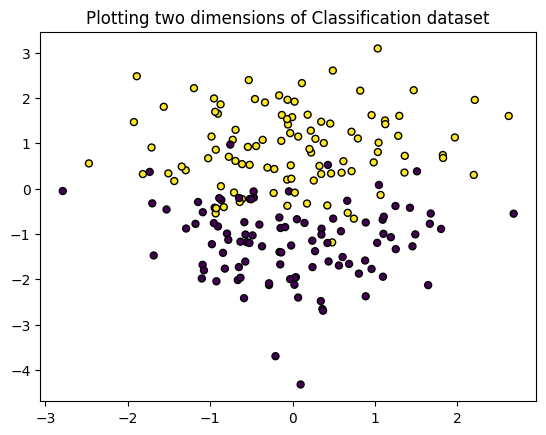

In [11]:
plt.title("Plotting two dimensions of Classification dataset")
plt.scatter(X_class[:, 0], X_class[:, 1], marker='o', c=y_class, s=25, edgecolor='k')
plt.show()

We now use a similar algorithm offered by scikit-learn to build a regression dataset. [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) produces regression targets as an optionally-sparse random linear combination of random features, with noise. Its informative features may be uncorrelated, or low rank (few features account for most of the variance).

In [12]:
X_reg, y_reg = sklearn.datasets.make_regression(n_samples=200, n_features=20)

In [13]:
X_reg[0]

array([ 0.06204326,  1.80189978,  0.10275095,  0.72546816,  1.03785601,
        0.66454369, -0.07399625,  1.65014436, -1.01358694,  0.4915125 ,
       -0.23846742, -0.00919722,  0.8262232 ,  1.07777454,  0.19120103,
        0.04293577, -0.32960699,  0.32923186, -0.27096213,  1.0145691 ])

In [14]:
y_reg[0]

419.7964130451764

Here, we see X (features, dimensions, or columns) and y (feature or value to be predicted) of the first two data points. Remember that our hope is to find a function f(x), such that f(X) best maps onto y. While in classification we deal with descrete values, usually a class or label, in regression we are often dealing with numerical values.

So we've created a toy dataset for classification with 200 samples, 20 features, and 2 target classes. For regression instead of two classes, its one numerical value. Most standard classification and regression have such set ups.
Let us now split this into training and testing class so that we can begin to train and test models.

In [15]:
X_train_class, X_test_class, y_train_class, y_test_class = sklearn.model_selection.train_test_split(X_class, y_class)

In [16]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = sklearn.model_selection.train_test_split(X_reg, y_reg)

### Supervised Learning

Supervised learning is the setting where we have labelled training data, or a target value alongside our data that allows us to explicitly discipline our model to produce the target. Now we will train some simple models to predict values and labels.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

***Here we call the built-in algorithm of Logistic regression and linear regression from sklearn package.

In [18]:
logreg = LogisticRegression()

In [19]:
linreg = LinearRegression()

In [20]:
logreg.fit(X_train_class, y_train_class)

LogisticRegression()

In [21]:
linreg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [22]:
logreg.predict(X_test_class[0].reshape(1, -1))

array([1])

In [23]:
linreg.predict(X_test_reg[0].reshape(1, -1))

array([351.03555304])

Boom! That's all it takes in scikit learn to train a logistic regression and linear regression model, two simple machine learning models for classification and regression. Scikit-learn offers many different supervised learning models we can try out: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### Testing and Performance

Once we have our model trained, the next step is to test its performance. Seeing how well our model does is a key part of machine learning and deep learning, and we will have longer sections devoted exclusively to this topic, but let us begin with some basic measures of test performance.

In [24]:
import sklearn.metrics

Here, accuracy score measures the fraction of correctly classified samples, and r2_score measures R^2 (coefficient of determination).

In [25]:
sklearn.metrics.accuracy_score(y_test_class, logreg.predict(X_test_class))

0.82

In [26]:
sklearn.metrics.r2_score(y_test_reg, linreg.predict(X_test_reg))

1.0

For these toy datasets, basic linear models do well. Scikit-learn has many other metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

### Bias and Variance

When models overfit, they tend to have low bias but high variance, and when they underfit, they tend to have high bias and low variance. A linear model will often underfit data, and a high-dimensional polynomial model will overfit it. This example from scipy lectures illustrates this process: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html

In [27]:
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [29]:
n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['linear regression (under-fit; high bias)',
          'polynomial quadratic function',
          'neural network (over-fit; high variance)']
degrees = [1, 2, 6]

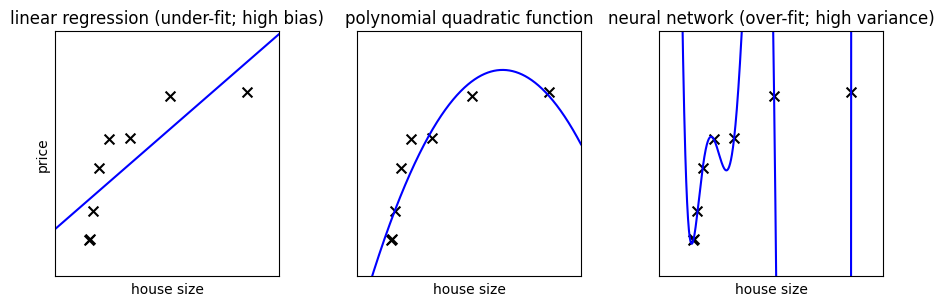

In [30]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.35)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

## Unsupervised Learning

When we don't have labels associated with data, we turn to the wide range of unsupervised learning tools available to us in order to discover relevant structure from data. A simple unsupervised task is to cluster or partition data, but many other unsupervised structures (e.g., hierarchy, network, etc.) may be induced from data.

### Clustering

Clustering algorithms attempt to find groups where objects within the group are more similar to each other than objects out of group. Let us try and generate some data blobs and see how a popular clustering algorithm, **kmeans**, performs in their identification.

https://scikit-learn.org/stable/modules/clustering.html

In [31]:
X_blob, labels = sklearn.datasets.make_blobs(n_samples=200, n_features=20, centers=2)

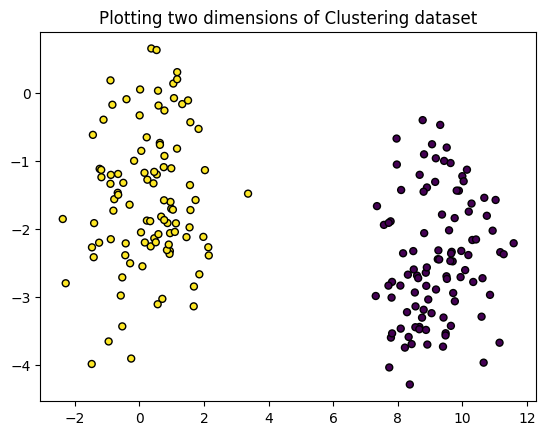

In [32]:
plt.title("Plotting two dimensions of Clustering dataset")
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c=labels, s=25, edgecolor='k')
plt.show()

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2)

In [35]:
kmeans.fit(X_blob)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [36]:
labels[0:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [37]:
kmeans.labels_[0:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

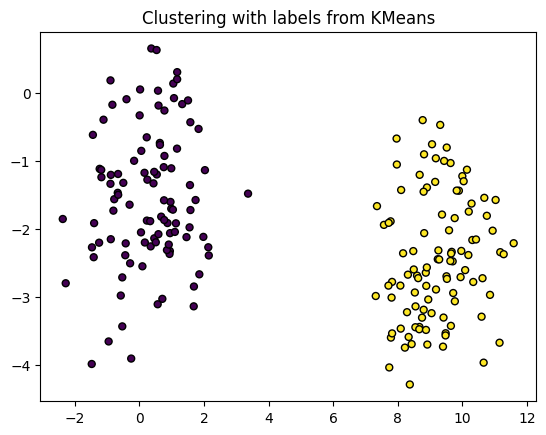

In [38]:
plt.title("Clustering with labels from KMeans")
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c=kmeans.labels_, s=25, edgecolor='k')
plt.show()

Bam! Even without any training data **kmeans** was able to find two clusters. Admittedly, this was a straightforward clustering task and real world tasks are rarely this easy.

## Dimensionality reduction

Dimensionality reduction is a widely used class of algorithms used to tranform a high dimensional space to a low dimensional space which retains meaningful relationships and information from the original data.
https://scikit-learn.org/stable/modules/decomposition.html

Let's use the popular Principal Component Analysis [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis?utm_source=thenewstack&utm_medium=website&utm_campaign=platform) method which transforms data into a new set of principal axes while retaining as much variation as possible.

The principal components of a collection of points in a real p-dimensional space are a sequence of p direction vectors, where the ith vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. These directions constitute an "orthonormal basis" in which distinct dimensions of the data are linearly uncorrelated. PCA is the process of computing the principal components and using them to reduce dimension of the data (often using the first few principal components and ignoring the rest).

Let us try using it to plot our original classification data, which had 20 features.

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
X_r = pca.fit(X_class).transform(X_class)

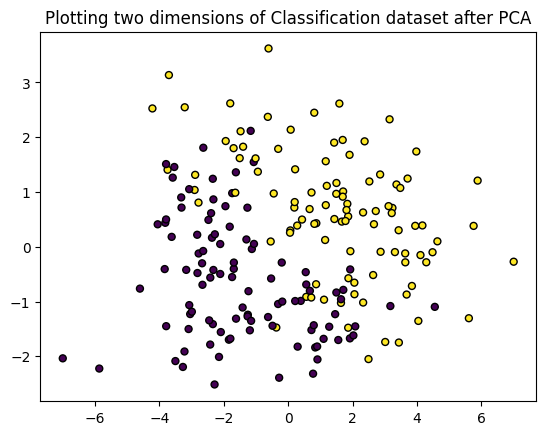

In [42]:
plt.title("Plotting two dimensions of Classification dataset after PCA")
plt.scatter(X_r[:, 0], X_r[:, 1], marker='o', c=y_class, s=25, edgecolor='k')
plt.show()

We see that this transformation distinguishes between the two classes a lot better than the plotting the 1st two features of the 20 dimensional representation!

### Manifold Learning

Based on the idea of dimensionality reduction, there exist an emerging suite of non-linear approaches to represent data that are more amenable to discovering non-linear representations from data. These methods are also referred to as manifold learning. Let's quickly whip up [tSNE](https://distill.pub/2016/misread-tsne/) (or [t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)), a widely used dimensionality reduction method and visualise the data.

t-SNE enables visualization of high-dimensional data, giving each datapoint a location within a two or three-dimensional map in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

https://scikit-learn.org/stable/modules/manifold.html


In [43]:
from sklearn.manifold import TSNE

In [44]:
def plot_tsne(X, y, perplexity=30, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)
    plt.title("tSNE plot")
    plt.xticks(())
    plt.yticks(())

    plt.show()

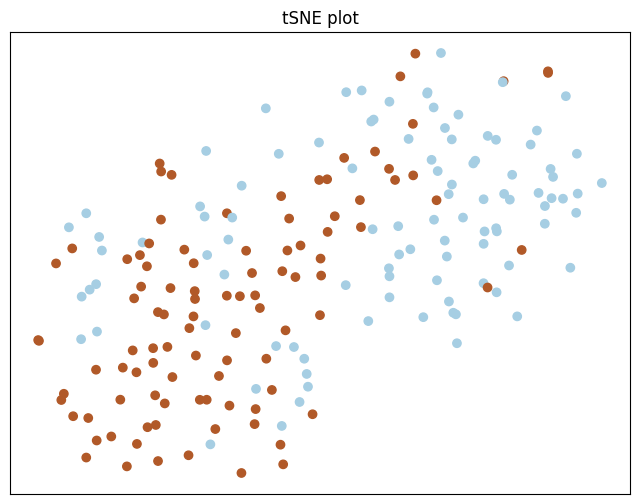

In [45]:
plot_tsne(X_class, y_class, perplexity=50)

*Like* PCA, this representation of the data is better at visually distinguishing between our two classes. t-SNE does have a few documented issues and peculiarities, which you can see here: [how to use t-SNE effectively](https://distill.pub/2016/misread-tsne/). Uniform Manifold Approximation and Projection or [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) is an alternative to t-SNE, but more effective at preserving global distances, and allows projection to arbitrary numbers of dimensions (not just 2).

### Metric Learning

Similar to our previous methods which changed the way we represented data and calculated distances between points, there exists a sub domain of metric learning devoted to learning metrics for a set of data points that are more useful for the task at hand (such as clustering), especially in higher dimensions when Euclidean (straight-line) distance is not as useful. We will be using the package metric learn, which is scikit learn compatible.

Let us quickly whip up a classification dataset once more. This time we set it up such that the classes are not very easy to seperate if we plot it - this allows us to better appreciate the metric learning algorithms.

In [46]:
X, y = sklearn.datasets.make_classification(n_samples=100, n_classes=3, n_clusters_per_class=2,
                           n_informative=3, class_sep=4., n_features=5,
                           n_redundant=0, shuffle=True,
                           scale=[1, 1, 20, 20, 20])

In [47]:
pip install metric_learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.5 MB/s eta 0:00:00


In [48]:
import metric_learn

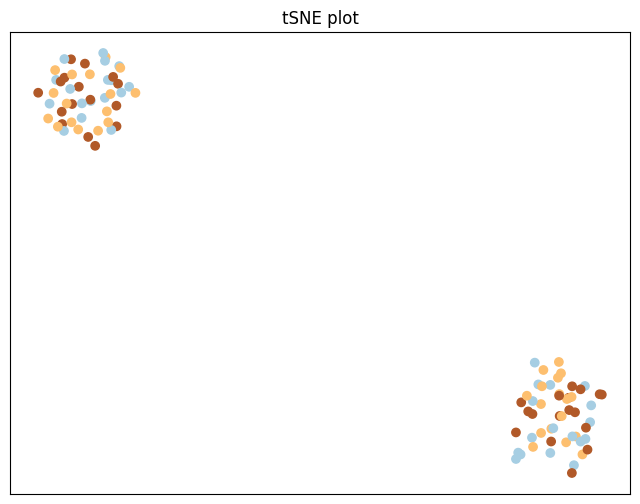

In [49]:
plot_tsne(X, y, perplexity=50)

We see here that two of the classes are difficult to seperate

In [50]:
itml = metric_learn.ITML_Supervised()
X_itml = itml.fit_transform(X, y)

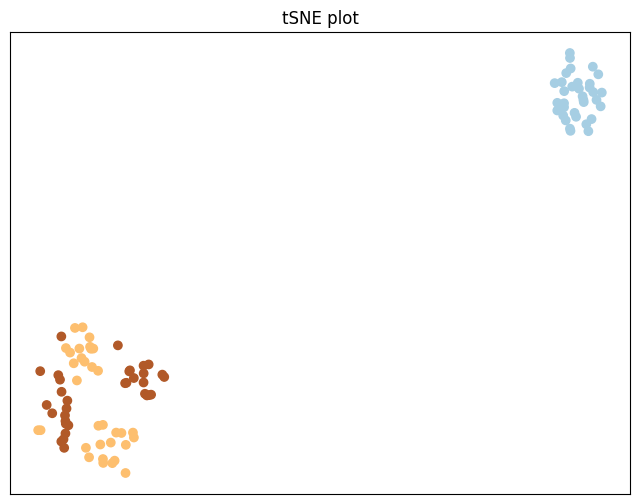

In [51]:
plot_tsne(X_itml, y, perplexity=50)

By warping the metric space, the points can now be seperated more conveniently than before.
Metric learning algorithms can also be used for clustering, nearest neighbor models, and in general, manipulating embedding spaces.

#Grading philosophy

**For each homework, we will only grade the best $\left \lfloor{N/2+1}\right \rfloor$ answers**. That is, for this homework, the best *4 of 7* answers (3.5+1 rounded down to the nearest integer). We want you to try all of the problems, but feel free to give up if you get stuck and you don't need that problem to be graded or to contribute to your project.

# <span style="color:red">*Homework Exercise*</span>

So far, every example used a synthetic (aka fake, made-up, simulated) dataset. This can make Machine Learning look easier than it is. *Real world* machine learning can be a lot more difficult. The purpose of this homework is for you to experience some of these real world problems we face. This notebook featured several different aspects of Machine Learning, from loading data to metric learning.

Immediately below each of the following 7 prompts add Colab cells that:

**1)** Find and load a dataset (with more than 500 data points), either (a) related to your research or thesis, (b) curated from a popular data repository, or (c) associated with one of the class projects that students will undertake, which explores a social scientific area of your interest. [kaggle.com](https://www.kaggle.com/datasets) is a popular website for machine learning related datasets, and you can find a good resource for social science datasets [here](https://guides.emich.edu/data/free-data).

In [55]:
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
data = read_csv('/content/2019.csv')

**2)** Apply 3 of the analysis techniques (e.g., kmeans clustering, logistic classification, linear regression, PCA/tSNE/metric dimension reduction) that we piloted with simulated data in the notebook above.


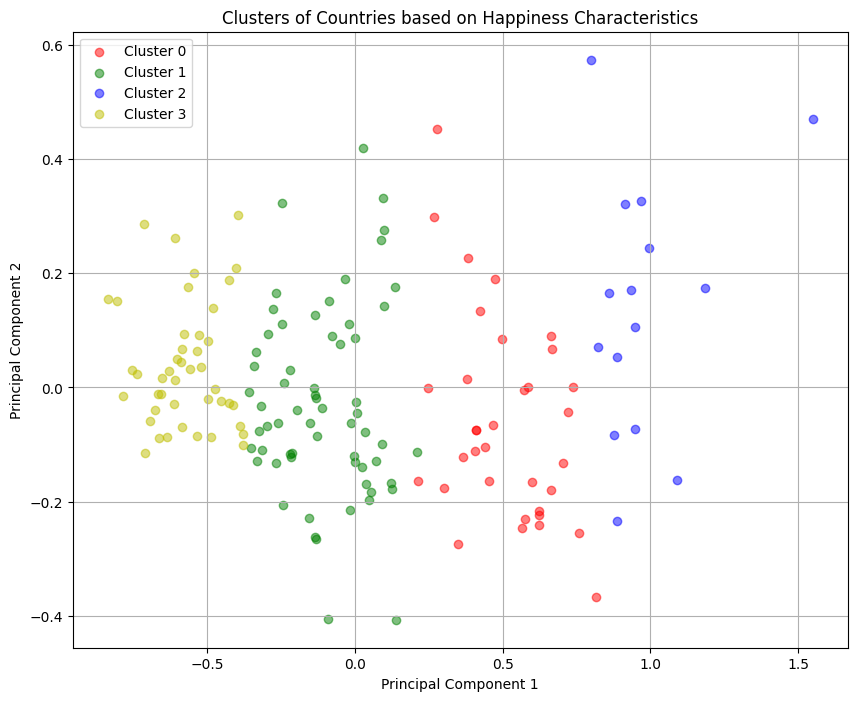

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Selecting the features for clustering
features = data[['GDP per capita', 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]


kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features)

data['Cluster'] = cluster_labels


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenating the cluster labels
finalDf = pd.concat([principalDf, data[['Cluster']]], axis=1)

# Plotting the clusters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']
for cluster in range(4):
    clustered_data = finalDf[finalDf['Cluster'] == cluster]
    plt.scatter(clustered_data['principal component 1'], clustered_data['principal component 2'],
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)
plt.title('Clusters of Countries based on Happiness Characteristics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

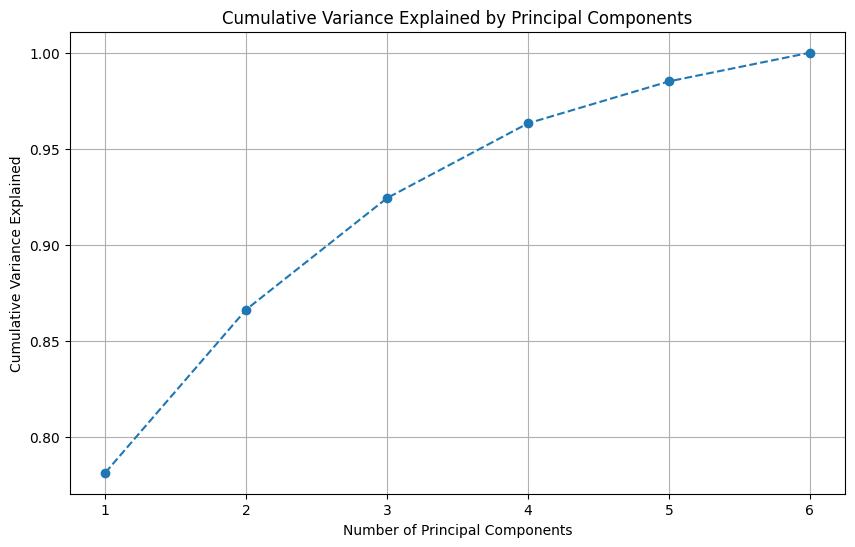

array([0.78162362, 0.866446  , 0.92443173, 0.96328796, 0.98508817,
       1.        ])

In [57]:
pca_full = PCA()
pca_full.fit(features)

# Calculating the cumulative variance explained by the principal components
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

cumulative_variance

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = features
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

mse, r2, intercept, coefficients

(0.41469294646618693,
 0.6498014441077301,
 1.9700281269219055,
 array([0.90136243, 1.07339052, 0.77656548, 1.60353202, 0.19535437,
        1.21731035]))

**3)** Repeat the same 3 analyses, but using a different but comparable algorithm (e.g., from the link in the section or [here](https://scikit-learn.org/stable/), such as hierarhical clustering, random forest classification, LASSO regression, UMAP dimension reduction).

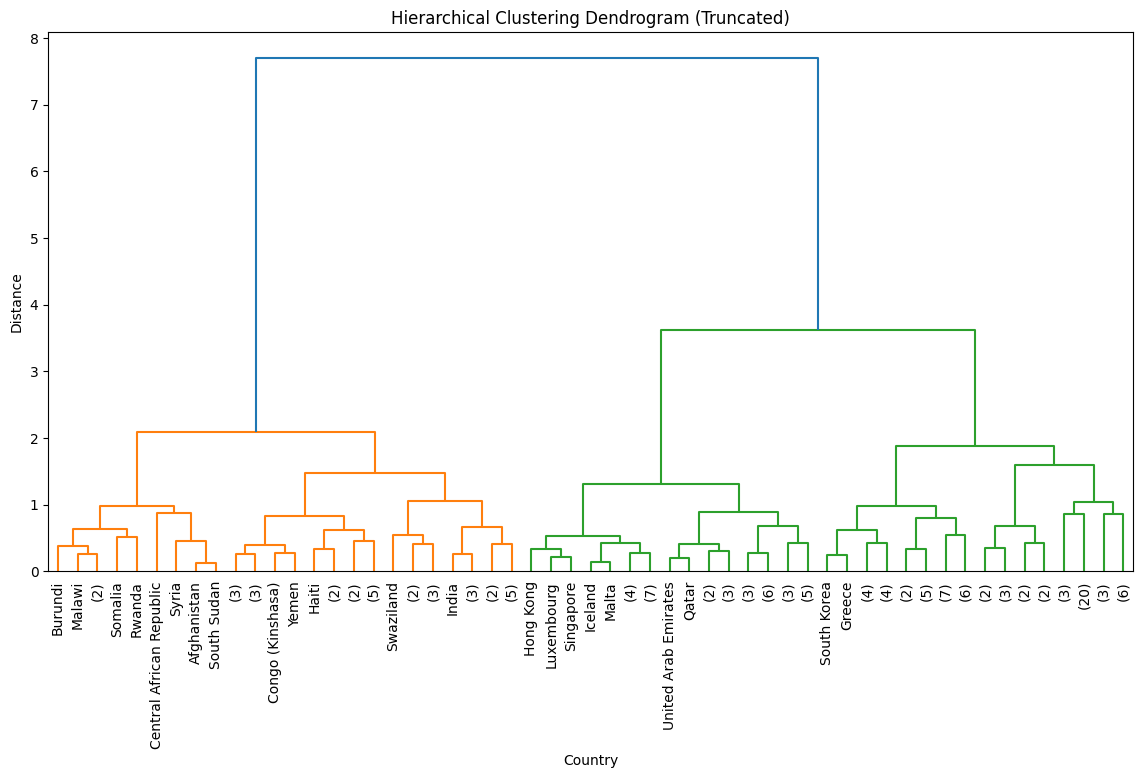

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating the linkage matrix using Ward's method
Z = linkage(features, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(Z, labels=data['Country or region'].values, leaf_rotation=90, leaf_font_size=10, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=b3f3c24801758fac418e18b0a12f4835d11605e1ab05b67ae51d8329f5375f84
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


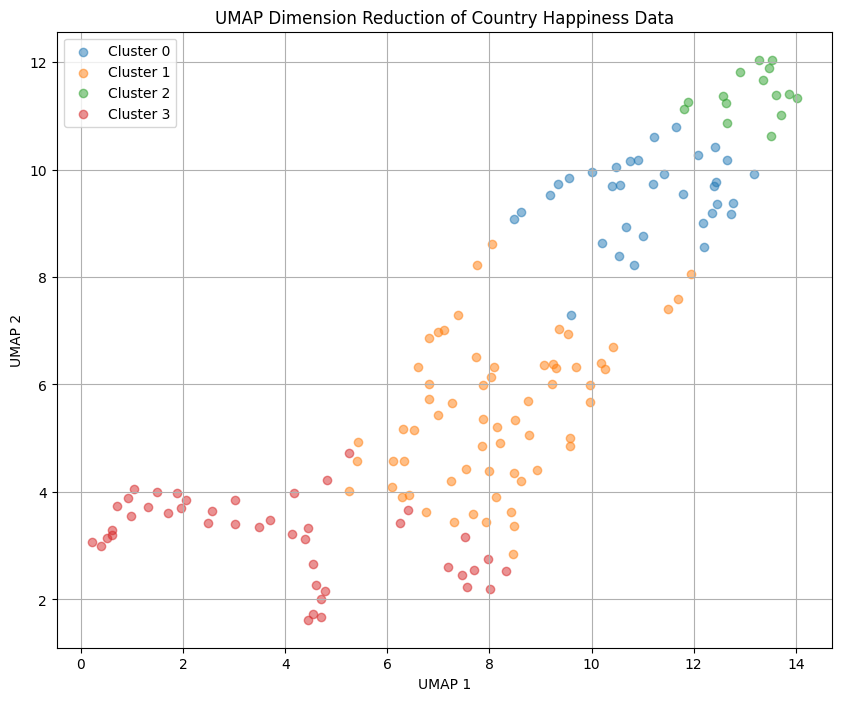

In [63]:
!pip install umap-learn
from umap import UMAP

# Applying UMAP for dimension reduction
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_result = umap.fit_transform(features)


umap_df = pd.DataFrame(data=umap_result, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = data['Cluster']

# Plotting the UMAP results
plt.figure(figsize=(10, 8))
for cluster in range(4):
    clustered_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(clustered_data['UMAP 1'], clustered_data['UMAP 2'], label=f'Cluster {cluster}', alpha=0.5)
plt.title('UMAP Dimension Reduction of Country Happiness Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
from sklearn.linear_model import LassoCV

# Using LassoCV for automatic regularization strength selection
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

# Making predictions on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculating the performance metrics for the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Coefficients and intercept from the Lasso model
coefficients_lasso = lasso.coef_
intercept_lasso = lasso.intercept_

mse_lasso, r2_lasso, intercept_lasso, coefficients_lasso


(0.42526910885717417,
 0.640870120756881,
 2.2045975889692904,
 array([1.04467423, 0.9880848 , 0.64757227, 1.50176156, 0.        ,
        0.32195618]))

**4)** Choose 2 different machine learning evaluation *tasks* and use them on your dataset to compare the proposed algorithm analysis (task **2**) and your alternative machine learning analysis (task **3**). These could include computing a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix), perform a [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html), fitting a [validation curve](https://scikit-learn.org/stable/modules/learning_curve.html), or creating an [ROC plot](https://scikit-learn.org/stable/visualizations.html).

In [65]:
from sklearn.model_selection import cross_val_score

# Standard Linear Regression cross-validation
linear_regression_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

# LASSO Regression cross-validation
lasso_regression_scores = cross_val_score(LassoCV(cv=5, random_state=0), X, y, cv=5, scoring='r2')

linear_regression_scores_mean = linear_regression_scores.mean()
lasso_regression_scores_mean = lasso_regression_scores.mean()

linear_regression_scores_mean, lasso_regression_scores_mean

(-5.801001509838045, -5.7009778443852905)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

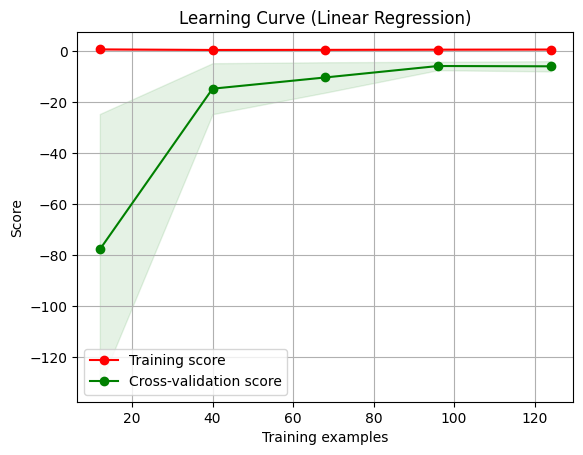

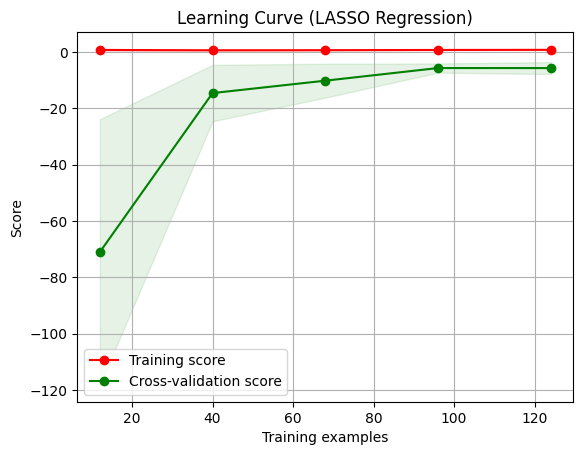

In [66]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# learning curve for Linear Regression
plot_learning_curve(LinearRegression(), "Learning Curve (Linear Regression)", X, y, cv=5)

# learning curve for LASSO Regression
plot_learning_curve(LassoCV(cv=5, random_state=0), "Learning Curve (LASSO Regression)", X, y, cv=5)

**4b)** Which methods were better for each task?

In [67]:
comparison= 'LASSO Regression' #@param {type:"string"}

**5)** Create one (or more!) informative visualization of your data and models (tasks **2-4**).

<ipython-input-70-36286cb5c2df>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_importance.sort_values(by='Importance', ascending=False), palette='coolwarm')


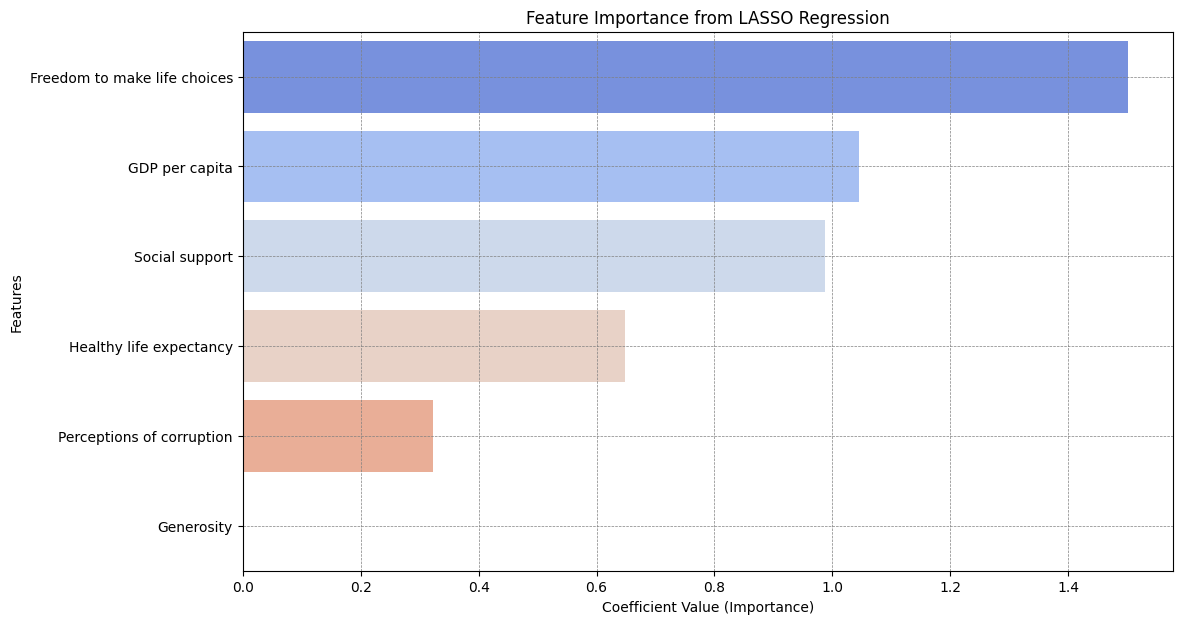

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

features_list = features.columns
coefficients_lasso = lasso.coef_
features_importance = pd.DataFrame({'Feature': features_list, 'Importance': coefficients_lasso})

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_importance.sort_values(by='Importance', ascending=False), palette='coolwarm')
plt.title('Feature Importance from LASSO Regression')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Features')
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()


**6)** Interpret the results of your investigations (tasks **2-5**) in a few descriptive sentences.

In [71]:
interpretation= "Clustering Analysis revealed distinct groupings of countries based on their happiness characteristics. These clusters suggest that countries can be segmented into meaningful groups that share similar levels of GDP per capita, social support, health, freedom, generosity, and perceptions of corruption. Regression Analysis (Linear and LASSO) modeled the relationship between happiness scores and various economic, social, and health factors. LASSO regression, with its ability to perform feature selection, identified GDP per capita, social support, and freedom to make life choices as significant predictors of happiness, while de-emphasizing the role of generosity by reducing its coefficient to zero. This indicates that economic stability, social support networks, and the freedom to make life choices are critical to enhancing a country's happiness." #@param {type:"string"}

**7)** Write down three questions about your data that emerge from this assignment, and a machine learning method you could use to approach or answer them.

In [72]:
extension= '1)Can we predict future happiness scores of countries based on current and past trends? 2) What are the most significant changes in happiness determinants over time. 3) How does the interconnectedness between countries (e.g., trade, migration) affect national happiness scores?  Wecan use Time Series Forecasting using ARIMA (AutoRegressive Integrated Moving Average) or LSTM (Long Short-Term Memory) neural networks. ' #@param {type:"string"}

## ***Hint***
Here is a reasonably sized dataset that we load for you. You can use it for this homework, or follow the steps to load your own for use in the machine learning tasks above.

You can get the dataset by the link:

https://drive.google.com/file/d/1XQrT4mAeOb79tmkNFFiPFIU4-N9JH7px/view?usp=sharing

The dataset comes from Kaggle:

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

In [ ]:
import pandas as pd

In [ ]:
bankruptcy_df = pd.read_csv(path_to_file)

In [73]:
#@markdown How many hours did it take you to complete this homework?
hours = 2.5 #@param {type:"number"}

In [74]:
#@markdown How hard was this homework?
too_easy_too_hard = 6 #@param {type:"slider", min:0, max:10, step:0.1}